*italicized text*# Graph Data Analytics

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


/Users/amalnormanhakim/opt/anaconda3/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


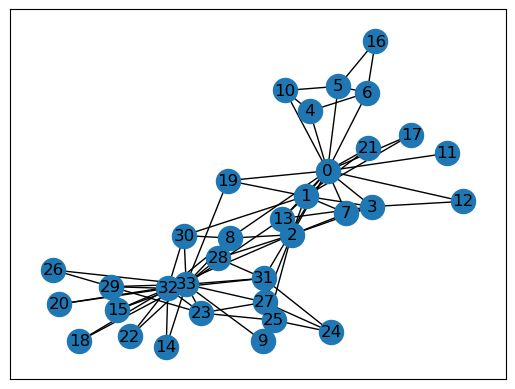

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(G)

nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), with_labels=True)

### Calculate page rank by using simple degree centrality

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

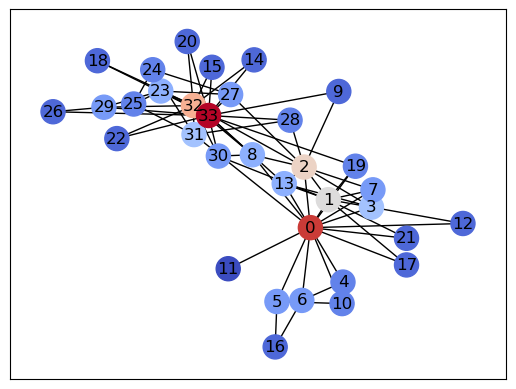

In [16]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

values

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


array([0.05714286, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143])

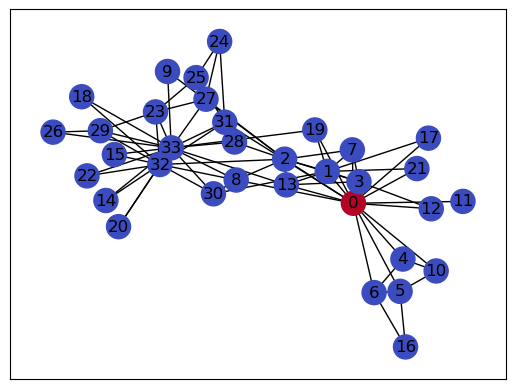

In [17]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw_networkx(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

values

In [23]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

Graph with 6175 nodes and 15969 edges
Graph with 50 nodes and 42 edges


/var/folders/9w/bz7gqryj7rq397t1r1xkrhf00000gn/T/ipykernel_47250/973125873.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))
/var/folders/9w/bz7gqryj7rq397t1r1xkrhf00000gn/T/ipykernel_47250/973125873.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G1))


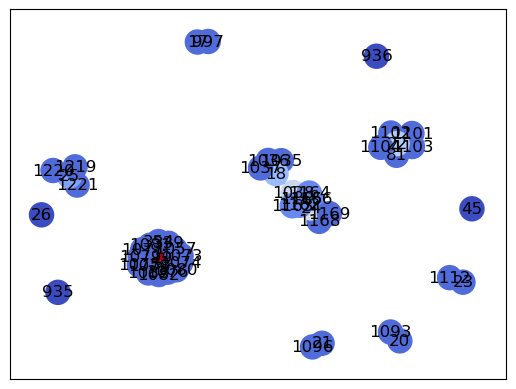

In [24]:
values = simple_pagerank(G1)
nx.draw_networkx(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


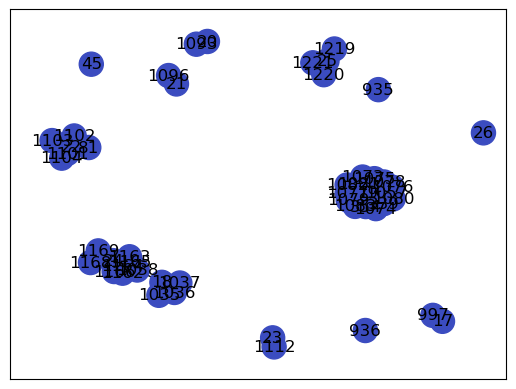

In [26]:
values = pagerank_centrality(G1)
nx.draw_networkx(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)